# Sentiment Analysis using Linear Regression and Bag of Words

### Setup

In [19]:
import numpy as np 
import pandas as pd

In [20]:
train = pd.read_csv("../train.csv")
val = pd.read_csv("../val.csv")

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer()

In [23]:
train_words = train.iloc[:,2]
train_labels = train.iloc[:,1]
to_class = lambda x : 1 if x <= 0.20 else 2 if x <= 0.4 else 3 if x <=0.6 else 4 if x <= 0.8 else 5 if x <= 1 else 0
train_labels = train_labels.apply(to_class)

In [24]:
train_features = vectorizer.fit_transform(train_words)

In [25]:
val_words = val.iloc[:,2]
val_labels = val.iloc[:,1]
val_labels = val_labels.apply(to_class)
val_features = vectorizer.transform(val_words)

### Linear Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [27]:
lin_model = LogisticRegression(
    max_iter=10000)

In [28]:
lin_model = lin_model.fit(train_features, train_labels)

In [29]:
val_pred = lin_model.predict(val_features)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(val_pred, val_labels)

0.6370438490155917

In [31]:
# for i in range (0, 100): 
#     print(val_words[i])
#     print("prediction:")
#     print(val_pred[i])
#     print("label:")
#     print(val_labels[i])

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("white")
from matplotlib import rc
rc('text', usetex=True)

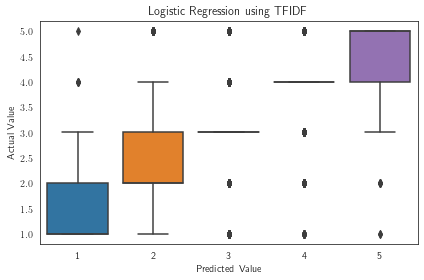

In [34]:
sns.boxplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Logistic Regression using TFIDF")
plt.tight_layout()
plt.savefig("visualization/lin_reg_scatter TFIDF.png", bbox_inches="tight", dpi=400)

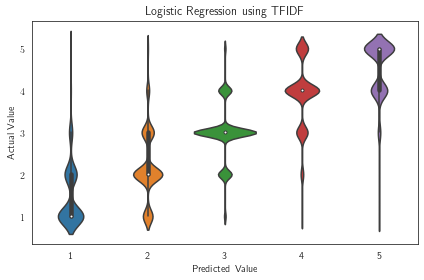

In [36]:
sns.violinplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Logistic Regression using TFIDF")
plt.tight_layout()
plt.savefig("visualization/lin_reg_violin_TFIDF.png", bbox_inches="tight", dpi=400)